# Libraries

In [210]:
import math
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition
from pandas.api.types import is_numeric_dtype

from collections import defaultdict
from scipy.stats.stats import pearsonr

# Data Understanding
## Dataset information
Displaying the dataset info before doing any operations on the data

In [199]:
df_tweets = pd.read_csv('./dataset/tweets.csv', sep=',', index_col=0)  # load tweets
df_tweets.info() #print info

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 509354017856950272 to 2312918930458324
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         971 non-null    object
 1   retweet_count   959 non-null    object
 2   reply_count     949 non-null    object
 3   favorite_count  951 non-null    object
 4   num_hashtags    913 non-null    object
 5   num_urls        947 non-null    object
 6   num_mentions    937 non-null    object
 7   created_at      1000 non-null   object
 8   text            961 non-null    object
dtypes: object(9)
memory usage: 78.1+ KB


Dropping duplicates and display changes using info()

In [200]:
df_tweets.drop_duplicates()
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 509354017856950272 to 2312918930458324
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         971 non-null    object
 1   retweet_count   959 non-null    object
 2   reply_count     949 non-null    object
 3   favorite_count  951 non-null    object
 4   num_hashtags    913 non-null    object
 5   num_urls        947 non-null    object
 6   num_mentions    937 non-null    object
 7   created_at      1000 non-null   object
 8   text            961 non-null    object
dtypes: object(9)
memory usage: 78.1+ KB


In [204]:
#Cleaning 'user_id' (drop id NaN)
#df_tweets['user_id'] = pd.to_numeric(df_tweets['user_id'], errors='ignore') # not needed

#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['user_id'], errors='coerce').isnull()].index)

df_tweets['user_id'] = pd.to_numeric(df_tweets['user_id'], downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets.drop(df_tweets[df_tweets['user_id'].isnull()].index, inplace=True) # Drop NaN in col 'user_id'
df_tweets['user_id'] = df_tweets['user_id'].astype('Int32', errors='ignore') # Cast to int

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 509354017856950272 to 587485987414155264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         956 non-null    int64 
 1   retweet_count   914 non-null    Int32 
 2   reply_count     909 non-null    Int32 
 3   favorite_count  906 non-null    Int32 
 4   num_hashtags    885 non-null    Int32 
 5   num_urls        903 non-null    Int32 
 6   num_mentions    893 non-null    Int32 
 7   created_at      956 non-null    object
 8   text            927 non-null    object
dtypes: Int32(6), int64(1), object(2)
memory usage: 90.2+ KB


In [205]:
#Cleaning 'created_at' #da questo si può creare l'entropia dell'utente

df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'], errors='coerce')
#df_tweets.drop(df_tweets[df_tweets['user_id'].isnull()].index, inplace=True) # Drop NaN in col 'user_id'
df_tweets['created_at'] = df_tweets['created_at'].astype('Int64', errors='ignore')
df_tweets['created_at'].apply(lambda x : np.NaN if x < 0 else x)


df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 509354017856950272 to 587485987414155264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         956 non-null    int64 
 1   retweet_count   914 non-null    Int32 
 2   reply_count     909 non-null    Int32 
 3   favorite_count  906 non-null    Int32 
 4   num_hashtags    885 non-null    Int32 
 5   num_urls        903 non-null    Int32 
 6   num_mentions    893 non-null    Int32 
 7   created_at      956 non-null    int64 
 8   text            927 non-null    object
dtypes: Int32(6), int64(2), object(1)
memory usage: 90.2+ KB


c:\Users\Kaos1\anaconda3\envs\dataMiningEnv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


In [206]:
#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['retweet_count'], errors='coerce').isnull()].index)

df_tweets['retweet_count'] = pd.to_numeric(df_tweets['retweet_count'],downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['retweet_count'] = df_tweets['retweet_count'].astype('Int32', errors='ignore')

#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['reply_count'], errors='coerce').isnull()].index)

df_tweets['reply_count'] = pd.to_numeric(df_tweets['reply_count'],downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['reply_count'] = df_tweets['reply_count'].astype('Int32', errors='ignore')

#int_mask = df_tweets['reply_count'].apply(lambda x : pd.api.types.is_integer(x)) # to keep only the integers

#df_tweets = df_tweets[int_mask]

#df_tweets['reply_count'] = pd.to_numeric(df_tweets['reply_count'], errors='ignore') # Only after this instruction the column becomes numerics


#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['favorite_count'], errors='coerce').isnull()].index)

df_tweets['favorite_count'] = pd.to_numeric(df_tweets['favorite_count'], downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['favorite_count'] = df_tweets['favorite_count'].astype('Int32', errors='ignore')


#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['num_hashtags'], errors='coerce').isnull()].index)

df_tweets['num_hashtags'] = pd.to_numeric(df_tweets['num_hashtags'], downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['num_hashtags'] = df_tweets['num_hashtags'].astype('Int32', errors='ignore')


#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['num_urls'], errors='coerce').isnull()].index)

df_tweets['num_urls'] = pd.to_numeric(df_tweets['num_urls'], downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['num_urls'] = df_tweets['num_urls'].astype('Int32', errors='ignore')


#df_tweets = df_tweets.drop(df_tweets[pd.to_numeric(df_tweets['num_mentions'], errors='coerce').isnull()].index)

df_tweets['num_mentions'] = pd.to_numeric(df_tweets['num_mentions'], downcast= 'integer', errors='coerce') # Only after this instruction the column becomes numerics
df_tweets['num_mentions'] = df_tweets['num_mentions'].astype('Int32', errors='ignore')

#Numero di hashtags, urls e mentions non hanno bisogno di essere validati perchè sono estratti direttamente da twitter

#df_tweets.drop(columns='text',inplace=True)

df_tweets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 509354017856950272 to 587485987414155264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         956 non-null    int64 
 1   retweet_count   914 non-null    Int32 
 2   reply_count     909 non-null    Int32 
 3   favorite_count  906 non-null    Int32 
 4   num_hashtags    885 non-null    Int32 
 5   num_urls        903 non-null    Int32 
 6   num_mentions    893 non-null    Int32 
 7   created_at      956 non-null    int64 
 8   text            927 non-null    object
dtypes: Int32(6), int64(2), object(1)
memory usage: 90.2+ KB


<AxesSubplot:ylabel='id'>

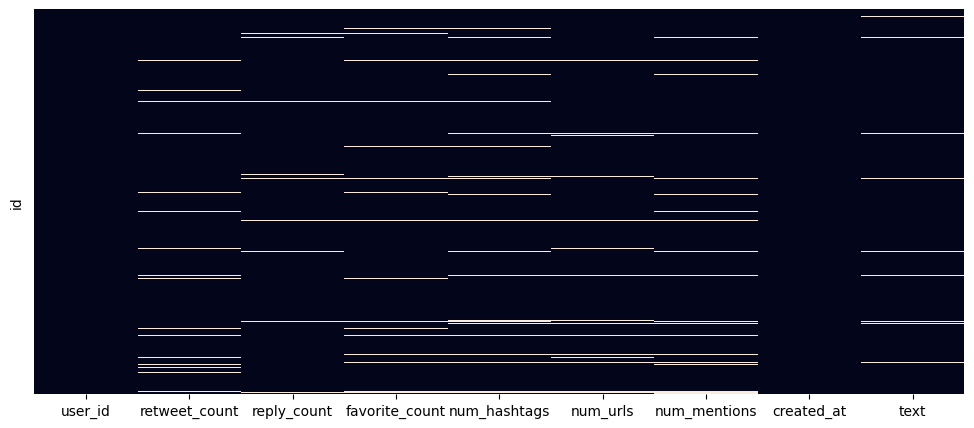

In [215]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

In [207]:
#From datetime64 to posix (seconds)
#PCA Can't be applied to datetime64, we should convert it to utc?

#df_tweets_pca = decomposition.PCA(n_components=5)
#df_tweets_pca.fit(df_tweets) 

#print(df_tweets_pca.components_)



ValueError: could not convert string to float: 'If man is a little lower than angels, then angels should reform.'

Dalla PCA sembra che le variabili più importanti siano created_at, user_id, retweet count e favorite_count

In [ ]:
#Checking users
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

df_users['statuses_count'].fillna(0,inplace=True)

df_users['created_at'] = pd.to_datetime(df_users['created_at'], errors='coerce')
df_users['created_at'] = df_tweets['created_at'].view(np.int64)

df_users.drop(df_users[df_users['name'].isnull()].index, inplace=True)
df_users = df_users.convert_dtypes()
df_users.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11507 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            11507 non-null  string
 1   lang            11507 non-null  string
 2   bot             11507 non-null  Int64 
 3   created_at      0 non-null      Int64 
 4   statuses_count  11507 non-null  Int64 
dtypes: Int64(3), string(2)
memory usage: 573.1 KB
